In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
Rtl_data = pd.read_csv('/content/jsu sail (1).csv', encoding = 'unicode_escape')
Rtl_data.head()

,SL.NO,D.O.P,CUSTOMER ID,INDUSTRY NAME,INDUSTRY TYPE,UNITS_PURCHASED (TONS),TOTAL AMOUNT,AREA,BRANCH CONTACTED,TYPE,THICKNESS,Unnamed: 11
0,1,2020-01-02,110251,Sharma and co.,Funiture Manufacturers,50,9000000,DELHI,DELHI,Coil,0.60,NaN
1,2,2020-01-03,110252,SSM and co.,Automobiles,80,14400000,TAMIL NADU,CHENNAI,Sheet,0.55,NaN
2,3,2020-01-05,110253,Amman and co.,Steel Manufacturers,120,21600000,TAMIL NADU,COIMBATORE,Coil,0.50,NaN
3,4,2020-01-07,110254,Vasanth and co.,Electronics,60,10800000,ANDHRA PRADESH,HYDERABAD,Coil,0.55,NaN
4,5,2020-01-07,110255,Alfin Steel industries,Electronics,70,12600000,KERALA,COIMBATORE,Sheet,0.60,NaN


In [ ]:
Rtl_data.shape

(700, 12)

In [ ]:
Rtl_data['CUSTOMER ID'].unique().shape

(160,)

In [ ]:
Rtl_data['D.O.P'] = pd.to_datetime(Rtl_data['D.O.P'])

In [ ]:
import datetime as dt

In [ ]:
Latest_Date = dt.datetime(2020,7,31)

In [ ]:
RFMScores = Rtl_data.groupby('CUSTOMER ID').agg({'D.O.P': lambda x: (Latest_Date - x.max()).days, 'CUSTOMER ID': lambda x: len(x), 'TOTAL AMOUNT': lambda x: x.sum()})
RFMScores['D.O.P'] = RFMScores['D.O.P'].astype(int)

In [ ]:
RFMScores.rename(columns={'D.O.P': 'Recency', 
                         'CUSTOMER ID': 'Frequency', 
                         'TOTAL AMOUNT': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()

,CUSTOMER ID,Recency,Frequency,Monetary
0,110032,6,7,54540000
1,110033,6,7,100260000
2,110034,6,7,116820000
3,110035,5,7,99360000
4,110036,5,7,68400000


In [ ]:
RFMScores.Recency.describe()

count    160.000000
mean      26.806250
std       21.644787
min        0.000000
25%       12.000000
50%       24.000000
75%       38.000000
max      179.000000
Name: Recency, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


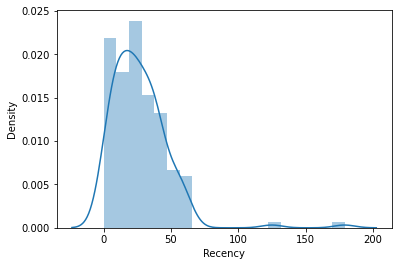

In [ ]:
import seaborn as sns
x = RFMScores['Recency']

ax = sns.distplot(x)

In [ ]:
RFMScores.Frequency.describe()

count    160.000000
mean       4.375000
std        1.807566
min        2.000000
25%        3.000000
50%        4.000000
75%        6.000000
max        8.000000
Name: Frequency, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


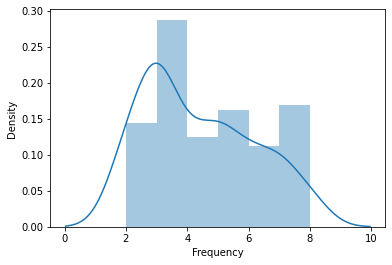

In [ ]:
import seaborn as sns
x = RFMScores.query('Frequency < 1000')['Frequency']

ax = sns.distplot(x)

In [ ]:
RFMScores.Monetary.describe()

count    1.600000e+02
mean     5.794275e+07
std      2.790813e+07
min      1.440000e+07
25%      3.402000e+07
50%      5.355000e+07
75%      7.660500e+07
max      1.254600e+08
Name: Monetary, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


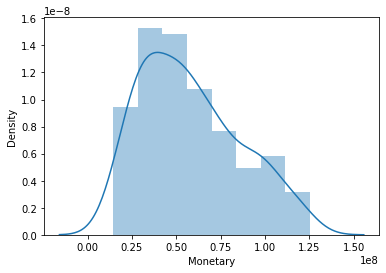

In [ ]:
import seaborn as sns
x = RFMScores.query('Monetary < 100000000000')['Monetary']

ax = sns.distplot(x)

In [ ]:
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.25: 3.0, 0.5: 4.0, 0.75: 6.0},
 'Monetary': {0.25: 34020000.0, 0.5: 53550000.0, 0.75: 76605000.0},
 'Recency': {0.25: 12.0, 0.5: 24.0, 0.75: 38.0}}

In [ ]:
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CUSTOMER ID,,,,,,
110032,6,7,54540000,1,1,2
110033,6,7,100260000,1,1,1
110034,6,7,116820000,1,1,1
110035,5,7,99360000,1,1,1
110036,5,7,68400000,1,1,2


In [ ]:
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)


In [ ]:
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CUSTOMER ID,,,,,,,,
110032,6,7,54540000,1,1,2,112,4
110033,6,7,100260000,1,1,1,111,3
110034,6,7,116820000,1,1,1,111,3
110035,5,7,99360000,1,1,1,111,3
110036,5,7,68400000,1,1,2,112,4


In [ ]:
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,CUSTOMER ID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,110032,6,7,54540000,1,1,2,112,4,Platinum
1,110033,6,7,100260000,1,1,1,111,3,Platinum
2,110034,6,7,116820000,1,1,1,111,3,Platinum
3,110035,5,7,99360000,1,1,1,111,3,Platinum
4,110036,5,7,68400000,1,1,2,112,4,Platinum


In [ ]:
pip install chart_studio

     |████████████████████████████████| 71kB 3.4MB/s 


In [ ]:
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

#Recency Vs Frequency
graph = RFMScores.query("Monetary < 5000000000 and Frequency < 20")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Frequency Vs Monetary
graph = RFMScores.query("Monetary < 50000000000 and Frequency < 20")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Recency Vs Monetary
graph = RFMScores.query("Monetary < 50000000000 and Frequency < 20")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)


In [ ]:
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



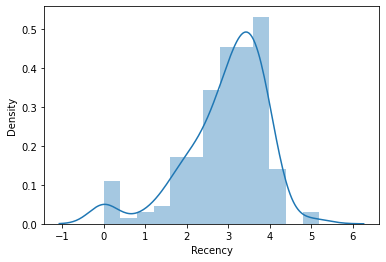

In [ ]:
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.distplot(Recency_Plot)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



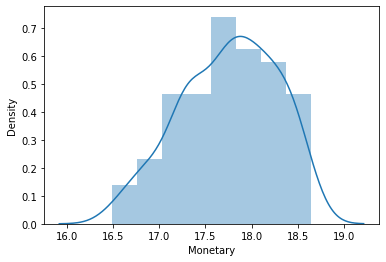

In [ ]:
Monetary_Plot = Log_Tfd_Data.query('Monetary < 100000000')['Monetary']
ax = sns.distplot(Monetary_Plot)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



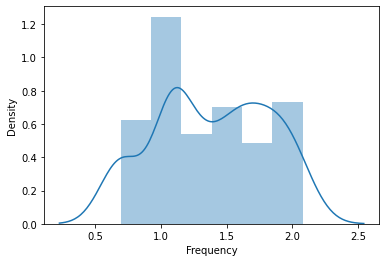

In [ ]:
Frequency_Plot = Log_Tfd_Data.query('Frequency < 100')['Frequency']
ax = sns.distplot(Frequency_Plot)

In [ ]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)

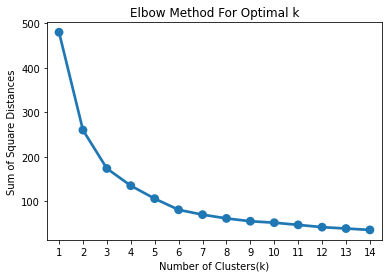

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
CUSTOMER ID,,,,,,,,,,
110032,6,7,54540000,1,1,2,112,4,Platinum,0
110033,6,7,100260000,1,1,1,111,3,Platinum,0
110034,6,7,116820000,1,1,1,111,3,Platinum,0
110035,5,7,99360000,1,1,1,111,3,Platinum,0
110036,5,7,68400000,1,1,2,112,4,Platinum,0


<Figure size 504x504 with 0 Axes>

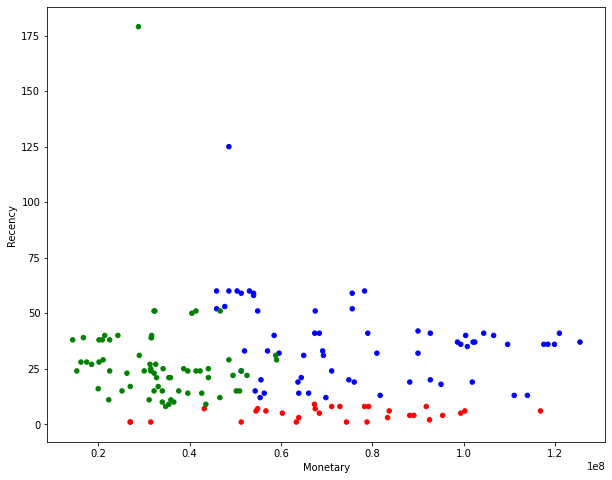

In [ ]:
  from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax = RFMScores.plot(    
    kind="scatter", 
    x="Monetary", y="Recency",
    figsize=(10,8),
    c = RFMScores['Color']
)

<Figure size 504x504 with 0 Axes>

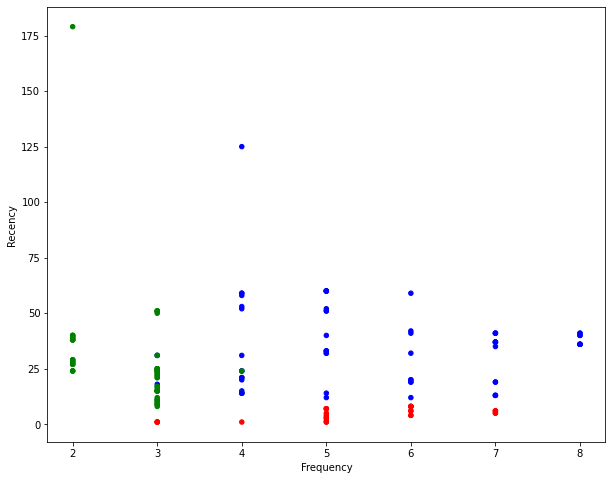

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax = RFMScores.plot(    
    kind="scatter", 
    x="Frequency", y="Recency",
    figsize=(10,8),
    c = RFMScores['Color']
)

<Figure size 504x504 with 0 Axes>

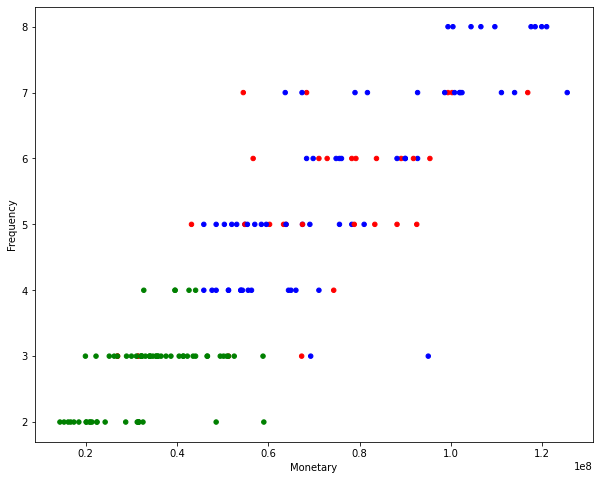

In [51]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax = RFMScores.plot(    
    kind="scatter", 
    x="Monetary", y="Frequency",
    figsize=(10,8),
    c = RFMScores['Color']
)

In [ ]:
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
CUSTOMER ID,,,,,,,,,,,
110032,6,7,54540000,1,1,2,112,4,Platinum,0,red
110033,6,7,100260000,1,1,1,111,3,Platinum,0,red
110034,6,7,116820000,1,1,1,111,3,Platinum,0,red
110035,5,7,99360000,1,1,1,111,3,Platinum,0,red
110036,5,7,68400000,1,1,2,112,4,Platinum,0,red
